<a href="https://colab.research.google.com/github/vanivaranya/QIBSIP-task-4/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#removing unwanted columns and renaming the columns

data = data[["v1","v2"]]
data.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [ ]:
data.sample(5)

,label,text
2664,ham,He remains a bro amongst bros
1901,ham,"Sorry, I'll call later"
4752,spam,Cashbin.co.uk (Get lots of cash this weekend!)...
5380,ham,Its sunny in california. The weather's just cool
2249,spam,"Thanks for your ringtone order, ref number R83..."


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: ylabel='label'>

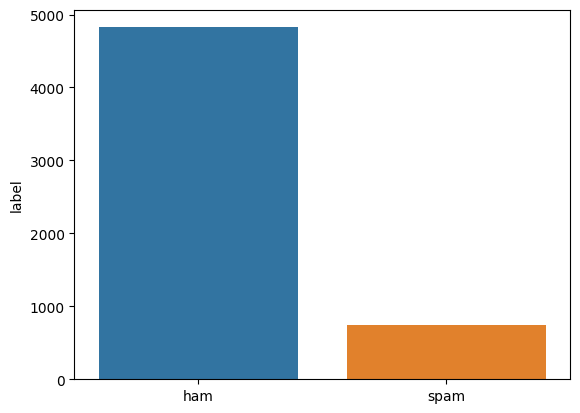

In [ ]:
sns.barplot(x=data.label.value_counts().index,y=data.label.value_counts())

<Axes: xlabel='text', ylabel='Count'>

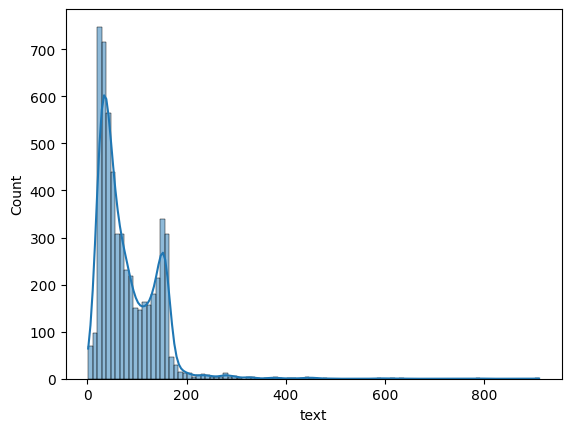

In [ ]:
sns.histplot(data["text"].apply(len),bins=100,kde=True)

Most length of Descriptions is in the range 0-200

<Axes: title={'center': 'Average Number of Sentences'}, xlabel='type', ylabel='sentences'>

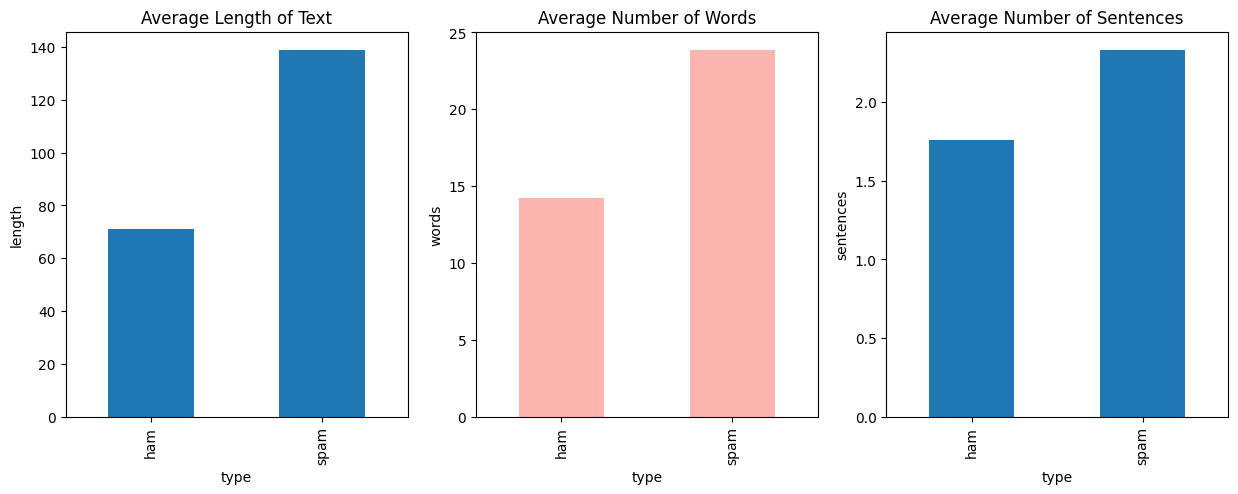

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

data.groupby("label").apply(lambda x: x["text"].apply(len).mean()).plot(
    kind="bar", ax=ax1, title="Average Length of Text",xlabel="type",ylabel="length")

data.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(
    x.split())).mean()).plot(kind="bar", ax=ax2, title="Average Number of Words",xlabel="type",ylabel="words",colormap="Pastel1")

data.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(x.split(
    ". "))).mean()).plot(kind="bar", ax=ax3, title="Average Number of Sentences",xlabel="type",ylabel="sentences")

Clearly Spam avg length is nearly double of ham.
Clearly Spam avg number of words is nearly double of ham.
Clearly Spam avg sentence count is greater than of ham.

(-0.5, 799.5, 511.5, -0.5)

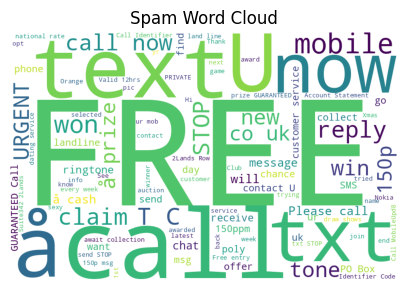

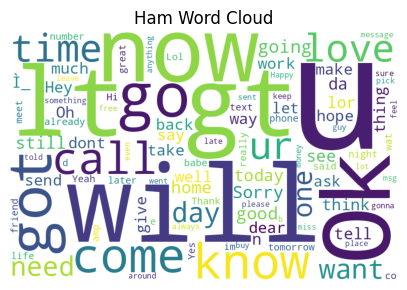

In [ ]:
#import wordcloud
from wordcloud import WordCloud

spam_words = ' '.join(list(data[data['label'] == 'spam']['text']))
spam_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(spam_words)

plt.figure(figsize = (5, 6))
plt.title('Spam Word Cloud')
plt.imshow(spam_wc)
plt.axis('off')


ham_words = ' '.join(list(data[data['label'] == 'ham']['text']))
ham_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(ham_words)

plt.figure(figsize = (5, 6))
plt.title('Ham Word Cloud')
plt.imshow(ham_wc)
plt.axis('off')

Data Preprocessing

In [ ]:
data["text"].sample(5)

3449                   Ya just telling abt tht incident..
4500                                So wat's da decision?
1420            No. She's currently in scotland for that.
3830    Let's pool our money together and buy a bunch ...
3535    Oic cos me n my sis got no lunch today my dad ...
Name: text, dtype: object

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwd = stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations

    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters

    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["clean_text"] = data["text"].apply(clean_text)

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["clean_text"], data["label"], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [ ]:
X_train.head()

1978                     boat still moms check half naked
3989    bank granite issues strong buy explosive pick ...
3935                    giving second chance rahul dengra
4078                   played smash bros ltgt religiously
4086    private 2003 account statement 07973788240 sho...
Name: clean_text, dtype: object

Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
# vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(1,3),lowercase=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_vectorized.shape, X_test_vectorized.shape

((4457, 7833), (1115, 7833))

Used Tfidf but CountVectorizer is giving more accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

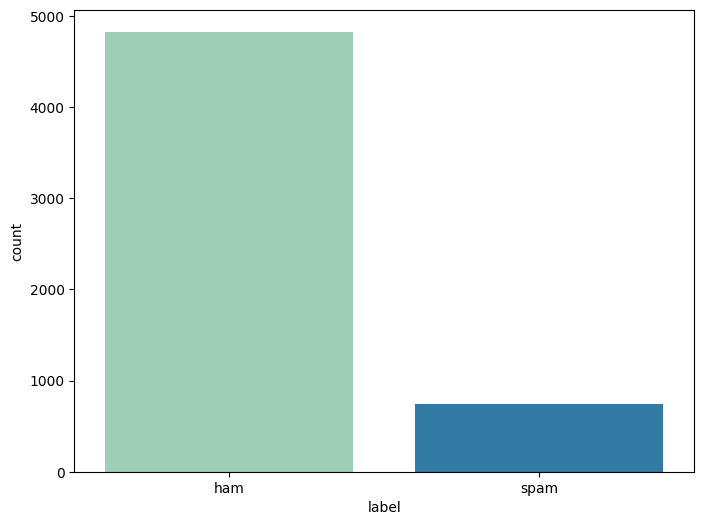

In [ ]:
#pd.DataFrame(y_train).value_counts().plot(kind="bar")

plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=data, palette="YlGnBu")
plt.show()

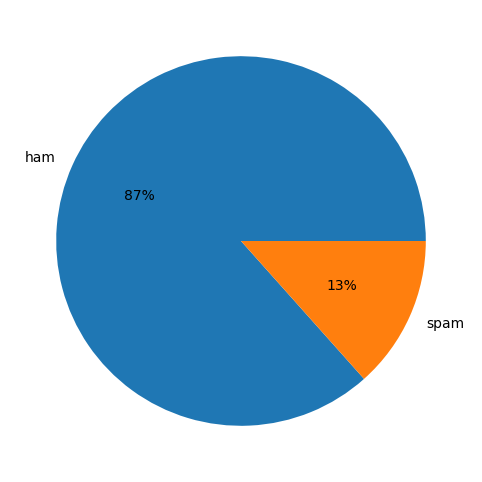

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = data["label"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

Highly imbalanced classes

In [ ]:
#Balancing both the classes using the RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of Vectorizer from train data
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_vectorized, y_train)

<Axes: xlabel='0'>

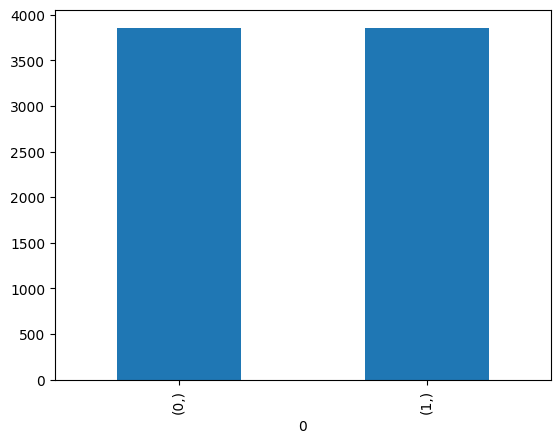

In [ ]:
pd.DataFrame(y_train_resampled).value_counts().plot(kind="bar")

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

Modelling

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,solver="sag",tol=0.001,max_iter=500,random_state=15)
lr.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1000, max_iter=500, random_state=15, solver='sag',
                   tol=0.001)

In [ ]:
print("Train Accuracy: ", lr.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", lr.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, lr.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, lr.predict(X_test_vectorized)))

Train Accuracy:  0.9998704663212435
Test Accuracy:  0.9775784753363229
Train Precision:  0.9997409997409997
Test Precision:  0.9629629629629629


Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

cnb = MultinomialNB(alpha=0.1)
cnb.fit(x_train_resampled,y_train_resampled)

MultinomialNB(alpha=0.1)

In [ ]:
print("Train Accuracy: ", cnb.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", cnb.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, cnb.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, cnb.predict(X_test_vectorized)))

Train Accuracy:  0.9920984455958549
Test Accuracy:  0.9641255605381166
Train Precision:  0.9894357124452461
Test Precision:  0.8481012658227848


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
print("Train Accuracy: ", rf.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", rf.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, rf.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, rf.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9730941704035875
Train Precision:  1.0
Test Precision:  0.9918032786885246


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
print("Train Accuracy: ", dt.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", dt.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, dt.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, dt.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9506726457399103
Train Precision:  1.0
Test Precision:  0.7914110429447853


In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(x_train_resampled,y_train_resampled)

SVC(random_state=42)

In [ ]:
print("Train Accuracy: ", svc.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", svc.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, svc.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, svc.predict(X_test_vectorized)))

Train Accuracy:  0.9998704663212435
Test Accuracy:  0.9766816143497757
Train Precision:  1.0
Test Precision:  0.9920634920634921


In [ ]:
y_pred_train_lr = lr.predict(x_train_resampled)
y_pred_test_lr = lr.predict(X_test_vectorized)

y_pred_train_cnb = cnb.predict(x_train_resampled)
y_pred_test_cnb = cnb.predict(X_test_vectorized)

y_pred_train_rf = rf.predict(x_train_resampled)
y_pred_test_rf = rf.predict(X_test_vectorized)

y_pred_train_dt = dt.predict(x_train_resampled)
y_pred_test_dt = dt.predict(X_test_vectorized)

y_pred_train_svc = svc.predict(x_train_resampled)
y_pred_test_svc = svc.predict(X_test_vectorized)


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

modelsdict = {"LR":lr,"CNB":cnb,"RF":rf,"DT":dt,"SVC":svc}

scoresdict = {}

for key,value in modelsdict.items():

    Train_ACC=accuracy_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Train_Prec=precision_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Test_ACC=accuracy_score(y_test,value.predict(X_test_vectorized.toarray()))
    Test_Prec=precision_score(y_test,value.predict(X_test_vectorized.toarray()))

    scoresdict[key] = [Train_ACC,Train_Prec,Test_ACC,Test_Prec]

scoresdf = pd.DataFrame(scoresdict,index=["Train_ACC","Train_Prec","Test_ACC","Test_Prec"]).T

In [ ]:
scoresdf.sort_values(by="Test_ACC",ascending=False)

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
LR,0.999870,0.999741,0.977578,0.962963
SVC,0.999870,1.000000,0.976682,0.992063
RF,1.000000,1.000000,0.973094,0.991803
CNB,0.992098,0.989436,0.964126,0.848101
DT,1.000000,1.000000,0.950673,0.791411


Thus, we can see LR model gives highest accuracy of 97.76 %.

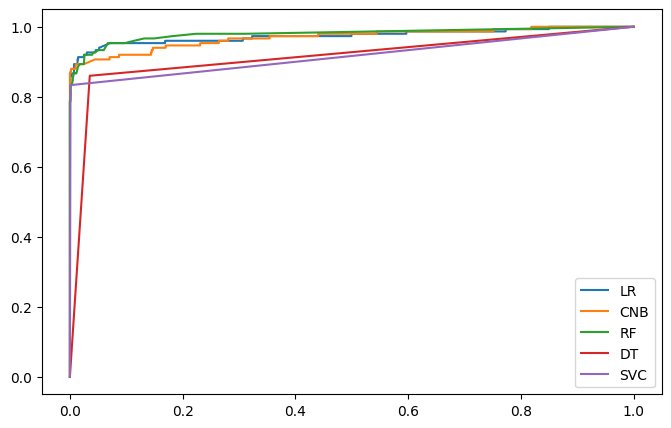

In [ ]:
# roc curve

plt.figure(figsize=(8,5))

for key,value in modelsdict.items():
    try:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict_proba(X_test_vectorized.toarray())[:,1])
    except:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict(X_test_vectorized.toarray()))
    plt.plot(fpr,tpr,label=key)
plt.legend()

Text(0.5, 1.0, 'Support Vector Classifier')

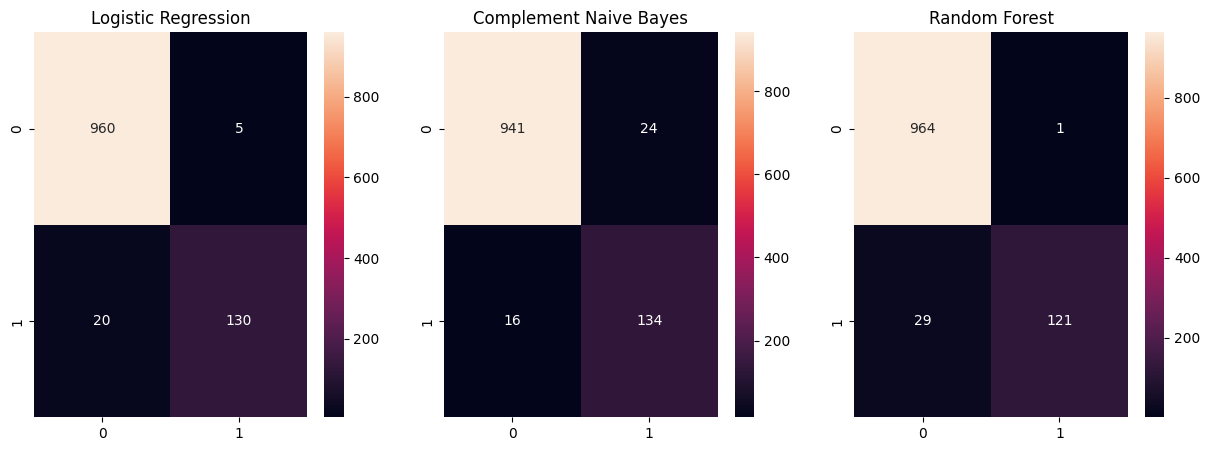

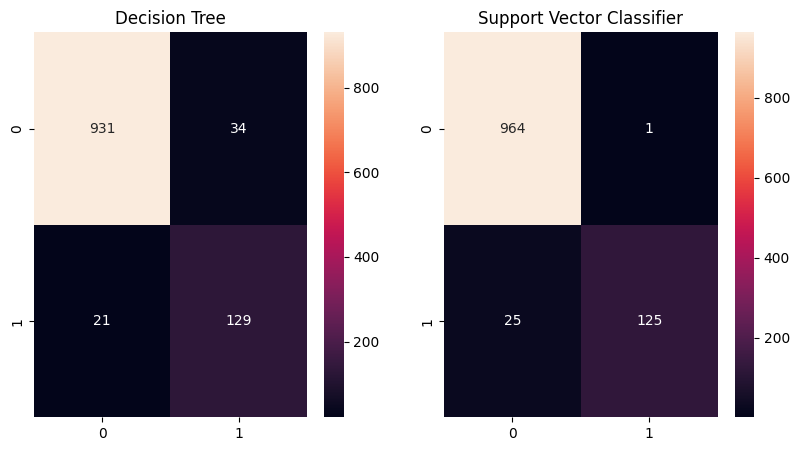

In [ ]:
cnf_lr = confusion_matrix(y_test,y_pred_test_lr)
cnf_cnb = confusion_matrix(y_test,y_pred_test_cnb)
cnf_rf = confusion_matrix(y_test,y_pred_test_rf)
cnf_dt = confusion_matrix(y_test,y_pred_test_dt)
cnf_svc = confusion_matrix(y_test,y_pred_test_svc)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(cnf_lr,annot=True,fmt="d")
plt.title("Logistic Regression")
plt.subplot(1,3,2)
sns.heatmap(cnf_cnb,annot=True,fmt="d")
plt.title("Complement Naive Bayes")
plt.subplot(1,3,3)
sns.heatmap(cnf_rf,annot=True,fmt="d")
plt.title("Random Forest")

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(cnf_dt,annot=True,fmt="d")
plt.title("Decision Tree")
plt.subplot(1,3,2)
sns.heatmap(cnf_svc,annot=True,fmt="d")
plt.title("Support Vector Classifier")